In [1]:
import pandas as pd # We know this one...
import requests # This is usefull with the API
import numpy as np # For performing numerical analysis
import matplotlib.pyplot as plt # Plotting
import weightedcalcs as wc # This allows for "weighted" calculations

In [ ]:
api/data?&UserID=Your-36Character-Key&method=GETDATASETLIST&ResultFormat=JSON&

In [2]:
BEA_ID = "6BF79D8C-8042-4196-88DC-0E0C55B0C3B6" # This is my Key

my_key = "https://APPS.BEA.gov/api/data?&UserID=" + BEA_ID 

data_set =  "&method=GetData&" + "datasetname=RegionalIncome&" # This access the Regional Income dataset

table_and_line_income = "TableName=CA30&LineCode=110&" # This grabs the income data

table_and_line_population = "TableName=CA1&LineCode=2&" # This grabs the populaiton data

year = "Year=" + "2010,2016" + "&" # Makes the years

location = "GeoFips=COUNTY&" # This is the location. I'm going to do this at the county level.

form = "ResultFormat=JSON" # The format.

In [75]:
lookatbea = "&method=GETPARAMETERVALUESFILTERED&datasetname=RegionalIncome&"

get_line_codes = "TargetParameter=LineCode&TableName=CA30&ResultFormat=json"
#getyears = getyears + "TargetParameter=Year&TableName=CA30&ResultFormat=JSON"

get_years = "TargetParameter=Year&TableName=CA30&ResultFormat=json"

In [79]:
r = requests.get(my_key + lookatbea+ get_line_codes)

#df_income = pd.DataFrame(r.json()["BEAAPI"]["Results"]["Data"])

In [80]:
r.json()["BEAAPI"]

{'Request': {'RequestParam': [{'ParameterName': 'DATASETNAME',
    'ParameterValue': 'REGIONALINCOME'},
   {'ParameterName': 'RESULTFORMAT', 'ParameterValue': 'JSON'},
   {'ParameterName': 'TARGETPARAMETER', 'ParameterValue': 'LINECODE'},
   {'ParameterName': 'METHOD', 'ParameterValue': 'GETPARAMETERVALUESFILTERED'},
   {'ParameterName': 'USERID',
    'ParameterValue': '6BF79D8C-8042-4196-88DC-0E0C55B0C3B6'},
   {'ParameterName': 'TABLENAME', 'ParameterValue': 'CA30'}]},
 'Results': {'ParamValue': [{'Key': '10', 'Desc': '[CA30] Personal income'},
   {'Key': '100', 'Desc': '[CA30] Population'},
   {'Key': '110', 'Desc': '[CA30] Per capita personal income'},
   {'Key': '120', 'Desc': '[CA30] Per capita net earnings'},
   {'Key': '130',
    'Desc': '[CA30] Per capita personal current transfer receipts'},
   {'Key': '140', 'Desc': '[CA30] Per capita income maintenance benefits'},
   {'Key': '150',
    'Desc': '[CA30] Per capita unemployment insurance compensation'},
   {'Key': '160', 'Desc

In [71]:
API_URL = my_key + data_set + table_and_line_income + year + location + form

r = requests.get(API_URL)

df_income = pd.DataFrame(r.json()["BEAAPI"]["Results"]["Data"])

In [72]:
df_income.head()

,CL_UNIT,Code,DataValue,GeoFips,GeoName,NoteRef,TimePeriod,UNIT_MULT
0,Dollars,CA30-110,"40,545",00000,United States,NaN,2010,0
1,Dollars,CA30-110,"49,831",00000,United States,NaN,2016,0
2,Dollars,CA30-110,"33,844",01000,Alabama,NaN,2010,0
3,Dollars,CA30-110,"39,294",01000,Alabama,NaN,2016,0
4,Dollars,CA30-110,"33,415",01001,"Autauga, AL",NaN,2010,0


In [73]:
df_income["DataValue"] = df_income["DataValue"].str.replace(",","")

#test_string.replace(",","")

df_income["DataValue"] = df_income["DataValue"].replace("(NA)", np.nan)

df_income["DataValue"] = df_income["DataValue"].astype("float")

In [74]:
df_income.rename(columns = {"DataValue": "income"}, inplace = True)

In [75]:
df_income.head()

,CL_UNIT,Code,income,GeoFips,GeoName,NoteRef,TimePeriod,UNIT_MULT
0,Dollars,CA30-110,40545.0,00000,United States,NaN,2010,0
1,Dollars,CA30-110,49831.0,00000,United States,NaN,2016,0
2,Dollars,CA30-110,33844.0,01000,Alabama,NaN,2010,0
3,Dollars,CA30-110,39294.0,01000,Alabama,NaN,2016,0
4,Dollars,CA30-110,33415.0,01001,"Autauga, AL",NaN,2010,0


In [76]:
df_income["TimePeriod"] = df_income["TimePeriod"].astype("float")

In [77]:
df_income["log_income"] = np.log(df_income["income"])

In [78]:
grp = df_income.groupby("GeoFips")

In [79]:
grp.get_group("00000").log_income.diff()

0         NaN
1    0.206225
Name: log_income, dtype: float64

In [80]:
grp.get_group("00000")

,CL_UNIT,Code,income,GeoFips,GeoName,NoteRef,TimePeriod,UNIT_MULT,log_income
0,Dollars,CA30-110,40545.0,00000,United States,NaN,2010.0,0,10.610168
1,Dollars,CA30-110,49831.0,00000,United States,NaN,2016.0,0,10.816393


In [81]:
def income_growth(df):
    
    new_df = pd.DataFrame()
    
    new_df["income"] = 100*(df.log_income.diff() / 6)
    
    new_df["time"] = df.TimePeriod
    
    new_df["GeoName"] = df.GeoName
    
    return new_df    

In [82]:
dfgrowth = grp.apply(income_growth)

In [83]:
dfgrowth.dropna(inplace = True)

In [84]:
dfgrowth.reset_index(level="GeoFips", inplace = True)

In [63]:
url = "https://raw.githubusercontent.com/mwaugh0328/"
url = url + "Did-China-Cause-Trump/master/us-election-2016-results-by-county.csv"

election_2016 = pd.read_csv(url)

election_2016.head(10)

,StateCode,StateName,CountyFips,CountyName,CountyTotalVote,Party,Candidate,VoteCount
0,AK,alaska,2000,Alaska,246588,GOP,Trump,130415.0
1,AL,alabama,1087,Macon,8748,GOP,Trump,1394.0
2,AL,alabama,1131,Wilcox,6095,GOP,Trump,1737.0
3,AL,alabama,1037,Coosa,5223,GOP,Trump,3376.0
4,AL,alabama,1009,Blount,25384,GOP,Trump,22808.0
5,AL,alabama,1133,Winston,10255,GOP,Trump,9225.0
6,AL,alabama,1123,Tallapoosa,18504,GOP,Trump,12967.0
7,AL,alabama,1053,Escambia,15213,GOP,Trump,10282.0
8,AL,alabama,1057,Fayette,8196,GOP,Trump,6705.0
9,AL,alabama,1049,DeKalb,26086,GOP,Trump,21779.0


In [65]:
print("\n 2016 Number of Canidates", election_2016.Candidate.unique())

trump_vote = election_2016[election_2016.Candidate == "Trump"].VoteCount.sum()
clinton_vote = election_2016[election_2016.Candidate == "Clinton"].VoteCount.sum()

print("Clinton Vote", clinton_vote, "Trump Vote", trump_vote)


 2016 Number of Canidates ['Trump' 'Clinton' 'Stein' 'Johnson' 'Castle']
Clinton Vote 59923033.0 Trump Vote 59692978.0


In [66]:
election_2016.tail()

,StateCode,StateName,CountyFips,CountyName,CountyTotalVote,Party,Candidate,VoteCount
15560,WY,wyoming,56037,Sweetwater,16661,CST,Castle,130.0
15561,WY,wyoming,56039,Teton,12176,CST,Castle,43.0
15562,WY,wyoming,56041,Uinta,8053,CST,Castle,116.0
15563,WY,wyoming,56043,Washakie,3715,CST,Castle,31.0
15564,WY,wyoming,56045,Weston,3334,CST,Castle,25.0


In [86]:
dfgrowth["GeoFips"] = dfgrowth["GeoFips"].astype(int)

In [87]:
dfgrowth.head()

,GeoFips,income,time,GeoName
1,0,3.437080,2016.0,United States
3,1000,2.488502,2016.0,Alabama
5,1001,2.792060,2016.0,"Autauga, AL"
7,1003,2.832856,2016.0,"Baldwin, AL"
9,1005,2.193907,2016.0,"Barbour, AL"


In [88]:
cens_election = pd.merge(dfgrowth, election_2016, how='inner',
                         left_on = "GeoFips", right_on = "CountyFips", indicator = True)

In [90]:
cens_election.head(15)

,GeoFips,income,time,GeoName,StateCode,StateName,CountyFips,CountyName,CountyTotalVote,Party,Candidate,VoteCount,_merge
0,1001,2.792060,2016.0,"Autauga, AL",AL,alabama,1001,Autauga,24661,GOP,Trump,18110.0,both
1,1001,2.792060,2016.0,"Autauga, AL",AL,alabama,1001,Autauga,24661,DEM,Clinton,5908.0,both
2,1001,2.792060,2016.0,"Autauga, AL",AL,alabama,1001,Autauga,24661,GRN,Stein,105.0,both
3,1001,2.792060,2016.0,"Autauga, AL",AL,alabama,1001,Autauga,24661,LIB,Johnson,538.0,both
4,1001,2.792060,2016.0,"Autauga, AL",AL,alabama,1001,Autauga,24661,CST,Castle,NaN,both
5,1003,2.832856,2016.0,"Baldwin, AL",AL,alabama,1003,Baldwin,94090,GOP,Trump,72780.0,both
6,1003,2.832856,2016.0,"Baldwin, AL",AL,alabama,1003,Baldwin,94090,DEM,Clinton,18409.0,both
7,1003,2.832856,2016.0,"Baldwin, AL",AL,alabama,1003,Baldwin,94090,GRN,Stein,453.0,both
8,1003,2.832856,2016.0,"Baldwin, AL",AL,alabama,1003,Baldwin,94090,LIB,Johnson,2448.0,both
9,1003,2.832856,2016.0,"Baldwin, AL",AL,alabama,1003,Baldwin,94090,CST,Castle,NaN,both


In [91]:
cens_election["VoteShare"] = cens_election.VoteCount / cens_election.CountyTotalVote

In [92]:
cens_election.head(15)

,GeoFips,income,time,GeoName,StateCode,StateName,CountyFips,CountyName,CountyTotalVote,Party,Candidate,VoteCount,_merge,VoteShare
0,1001,2.792060,2016.0,"Autauga, AL",AL,alabama,1001,Autauga,24661,GOP,Trump,18110.0,both,0.734358
1,1001,2.792060,2016.0,"Autauga, AL",AL,alabama,1001,Autauga,24661,DEM,Clinton,5908.0,both,0.239569
2,1001,2.792060,2016.0,"Autauga, AL",AL,alabama,1001,Autauga,24661,GRN,Stein,105.0,both,0.004258
3,1001,2.792060,2016.0,"Autauga, AL",AL,alabama,1001,Autauga,24661,LIB,Johnson,538.0,both,0.021816
4,1001,2.792060,2016.0,"Autauga, AL",AL,alabama,1001,Autauga,24661,CST,Castle,NaN,both,NaN
5,1003,2.832856,2016.0,"Baldwin, AL",AL,alabama,1003,Baldwin,94090,GOP,Trump,72780.0,both,0.773515
6,1003,2.832856,2016.0,"Baldwin, AL",AL,alabama,1003,Baldwin,94090,DEM,Clinton,18409.0,both,0.195653
7,1003,2.832856,2016.0,"Baldwin, AL",AL,alabama,1003,Baldwin,94090,GRN,Stein,453.0,both,0.004815
8,1003,2.832856,2016.0,"Baldwin, AL",AL,alabama,1003,Baldwin,94090,LIB,Johnson,2448.0,both,0.026018
9,1003,2.832856,2016.0,"Baldwin, AL",AL,alabama,1003,Baldwin,94090,CST,Castle,NaN,both,NaN


In [93]:
only_trump = cens_election[cens_election.Candidate == "Trump"].copy()

In [95]:
only_trump.tail()

,GeoFips,income,time,GeoName,StateCode,StateName,CountyFips,CountyName,CountyTotalVote,Party,Candidate,VoteCount,_merge,VoteShare
15280,56037,1.588818,2016.0,"Sweetwater, WY",WY,wyoming,56037,Sweetwater,16661,GOP,Trump,12153.0,both,0.729428
15285,56039,7.273795,2016.0,"Teton, WY",WY,wyoming,56039,Teton,12176,GOP,Trump,3920.0,both,0.321945
15290,56041,-0.323000,2016.0,"Uinta, WY",WY,wyoming,56041,Uinta,8053,GOP,Trump,6154.0,both,0.764187
15295,56043,3.208164,2016.0,"Washakie, WY",WY,wyoming,56043,Washakie,3715,GOP,Trump,2911.0,both,0.783580
15300,56045,1.934356,2016.0,"Weston, WY",WY,wyoming,56045,Weston,3334,GOP,Trump,2898.0,both,0.869226


In [107]:
nquantiles = 5 # This is the number of quintiles, it just allows me to change this at will.

labels = ["quantile " + str(var) for var in range(1,nquantiles + 1)]

# Here I'm goint to use list comprehension to create some lables, like quantile 1, etc.

inc_q = pd.qcut(only_trump["income"], # this says take quantiles by income
                nquantiles,           # The number of quantiels
                labels = labels)      # The labels to go withit.

grouped = only_trump.groupby(inc_q)   # Then this is the magic, I can group by it...

vote_income_quant = 100*(grouped.VoteCount.sum() / grouped.CountyTotalVote.sum())

                                       # Then this says, given the group, some over all votes (for trump)
                                       # Then divide by all votes, in total, for that group

print(vote_income_quant)

income
quantile 1    51.613787
quantile 2    50.493149
quantile 3    49.408776
quantile 4    48.805065
quantile 5    40.800230
dtype: float64


In [99]:
labels = ["poor", "rich"]

rich_poor = pd.cut(only_trump["income"], # this says take quantiles by income
                2,           # This does not do by qunitle, but just buts half in one bin, half in another....
                labels = labels)      # The labels to go withit.

grouped = only_trump.groupby(rich_poor)   # Then this is the magic, I can group by it...

vote_rich_poor = grouped.VoteCount.sum() / grouped.CountyTotalVote.sum()

                                       # Then this says, given the group, some over all votes (for trump)
                                       # Then divide by all votes, in total, for that group

print(vote_rich_poor)

income
poor    0.494926
rich    0.355820
dtype: float64


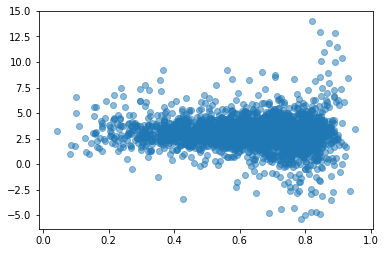

In [114]:
fig,ax = plt.subplots()

ax.scatter(only_trump["VoteShare"],only_trump["income"], alpha = 0.5)

plt.show()